MST 690  Data Science Mathematics				Name: __________________
Session 5  Statistical Inference
In-Class Exercise
Instructions: Solve each problem.  Show all work.  Attach additional sheets as necessary.  Unless otherwise stated, you may use Python or other tools to assist.

	You are a data scientist developing an algorithm for Russian event detection on Twitter, and are testing your algorithm using the 2018 Russian election as your test event.  You are interested in discursive similarity over time  the day-to-day similarity of discussion topics  within a target group of Twitter users.  You assume that, given the amount of noise on Twitter (e.g., the high variability of topics discussed on any ordinary day), your similarity metric will be near zero.  However, if a significant event occurs that becomes a hot topic of discussion, you hypothesize that your similarity metric will significantly increase for that given timeframe.  You have collected discursive similarity data that bracket the test event, and want to determine if an anomaly has occurred on the date of the Russian election, 18 March 2018.

Consider the Excel data set on Blackboard.  You will solve this by hand, as well as using Python.  When solving by hand, you may use Excel to calculate any descriptive statistics.  To infer any statistically significant difference from a specified value, the t-statistic can be calculated as follows:

t=(x -¼_0)/(sDn)

Where s is the sample standard deviation, µ0 is the specified value, n is the sample size, and x-bar is the sample mean.

	What is your null hypothesis?  Explain what rejection of the null hypothesis means in terms of statistical inference.


_The null hypothesis is that a given day is a normal day; that is, that the similarity metric will be very low. The alternative would be that something big is going down, and then suddenly everyone will be talking about essentially the same thing, and the similarity metric will go up significantly._

b)	Are you able to detect an anomalous event on 18 March 2018, given the above data set, and assuming a type I error rate of 5%?  Explain why or why not.

_to analyze this we'll need to import the data and do some calculations "by hand" but using python_

In [23]:
#import statements
import math
import pandas as pd


In [25]:
# bring in the dataset
dataset = r'./Dataset_Session5.csv' #Specify absolute path here.
data = pd.read_csv(dataset)
data_series = np.array(list(data['Similarity Metric (0.00-1.00)']))


In [26]:
# calculate mean
m=0.0
n = len(data_series)
for i in range(n):
    m += data_series[i] 
m /= n
print("m = ", m)

m =  0.07577999999999999


In [27]:
# calculate std dev using the 'sample' stddev [use n-1]
sigma=0.0
for d in data_series:
    sigma += (d - m)**2
sigma /= (n-1)
sigma = math.sqrt(sigma)
print("sigma = ", sigma)

sigma =  0.1464141523214201


In [56]:
# now let's get the data value based on the date of interest
date_of_interest = '18-Mar-18'

value_of_interest = data.loc[data['Date'] == date_of_interest]['Similarity Metric (0.00-1.00)'].iloc[0]
#print(data)
print(value_of_interest)

0.8965


In [66]:
# now use the student t test
# we'll model value_of_interest as ybar
t_numerator = m - value_of_interest 
t_denominator = math.sqrt( (sigma**2/n) + (0**2/1) )
t = t_numerator / t_denominator
print(t)

-43.41977659265283


In [67]:
# degrees of freedom
df = n + 1 - 2
print(df)

59


*Looking at any p value tables out there, 43 will be way beyond any critical value at 59 degrees of freedom (in this case, about 2.0), not just at the 5% level, but at any measurable level. Thus, the null hypothesis is rejected.*


c)	Find the p-value using Python (see Python notebook for this exercise).  Do you reject your hypothesis based on the calculated p-value?

In [69]:
python_t, python_p = stats.ttest_1samp(data_series, value_of_interest, axis=0)
print("Python computes the t and p values as: {}, {}".format(python_t, python_p))

Python computes the t and p values as: -43.41977659265283, 1.749492641970814e-46


_So again, looking at the python results, we easily reject the null hypothesis. 1.75e-46 is super small - way smaller than 5e-2._

d)	Calculate by hand again assuming a type I error rate of 1%.  What happens to the critical value of t?  Intuitively, why is this the case?  Does this change impact your conclusion?

Text(0.5, 1.0, 'Histogram of the provided data')

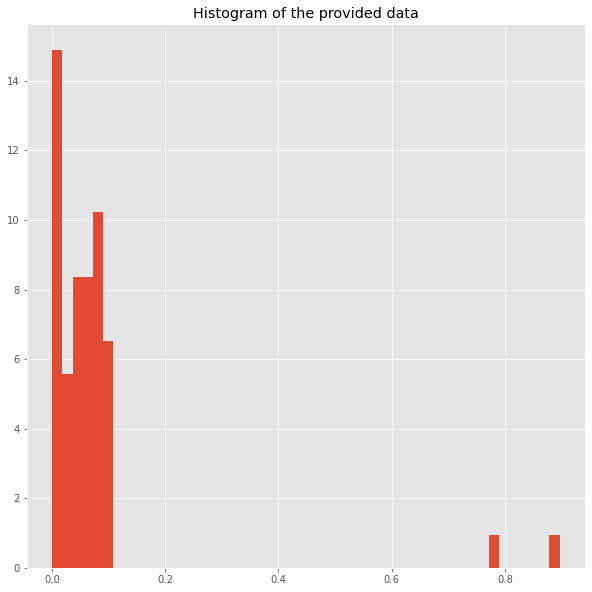

In [84]:
# finally, again as a crazy check to see intuitively if we're doing this right, it helps
# to do a quick histogram of the incidence rate of similarity values, which will help us intuitively see if 
# something seems close to the normal curve or lies discernibly outside of it.

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
bins = 50
fig_norm, ax0 = plt.subplots(figsize=(10,10))
(values, bins, _) = ax0.hist(data_series, bins = bins, density=True) 
bin_centers = 0.5*(bins[1:] + bins[:-1])
ax0.set_title('Histogram of the provided data')

In [85]:
# we can see that 0.89 will be way far away from the bulk of the data which is concentrated over at the left